<a href="https://colab.research.google.com/github/sladem-tox/Tox_data/blob/main/LD50_CurveFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LD50 Curve Fitting with Python using Scipy
`Dr. Slade Matthews, The University of Sydney, 2023`

This script demonstrates how to access experimental data saved on Github. Then we use scipy to fit a sigmoid curve to the data and generate 95% CI values for the estimates of Hill slope and LD50.

Resources:

https://www.myassays.com/four-parameter-logistic-regression.html

https://people.duke.edu/~ccc14/pcfb/analysis.html


Fitted Parameters:
C (EC50) = 1.47
D = 0.43
Confidence Interval for EC50 (C): (1.47, 1.47)
Confidence Interval for D: (0.43, 0.43)


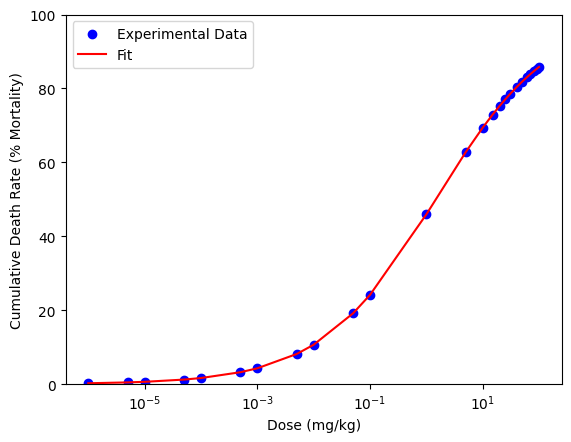

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Get data
df = pd.read_csv("https://github.com/sladem-tox/Tox_data/raw/main/LD50_DRdata.csv")
x_data = df["dose"]
y_true = df["Response"]

# Define sigmoid model where x is dose, C is LD50 (or EC50 if that is what you need), and D is Hill slope
def sigmoid_model(x, C, D):
    return 100 / (1 + (C / x) ** D)  # We normalize the response to 0-100%

# Initial parameter guesses just as we do in Excel Solver Class
initial_guess = [3.0, 0.5]  # Initial guess for C and D

# Set parameter bounds for C and D (adjust these bounds as needed [lower C, lower D], [upper C, upper D])
# This is the same as setting "constraints" in Solver
bounds = ([0.01, 0.01], [np.inf, np.inf])

# Fit the model to the data with parameter bounds
params, covariance = curve_fit(sigmoid_model, x_data, y_true, p0=initial_guess, bounds=bounds)

# Extract the fitted parameters
C_fit, D_fit = params

# Calculate the standard errors (square roots of the diagonal elements of the covariance matrix)
std_errors = np.sqrt(np.diag(covariance))

# Calculate the confidence intervals for the parameters (e.g., 95% confidence interval)
confidence_interval = 1.96  # For a 95% confidence interval (approximately)
conf_interval_C = (C_fit - confidence_interval * std_errors[0], C_fit + confidence_interval * std_errors[0])
conf_interval_D = (D_fit - confidence_interval * std_errors[1], D_fit + confidence_interval * std_errors[1])

# Generate predicted values using the fitted parameters
y_fit = sigmoid_model(x_data, C_fit, D_fit)

# Plot the data and the fitted curve
plt.scatter(x_data, y_true, label="Experimental Data", color="b")
plt.plot(x_data, y_fit, label="Fit", color="r")
plt.xscale("log")  # Set x-axis to log scale
plt.xlabel("Dose (mg/kg)")
plt.ylabel("Cumulative Death Rate (% Mortality)")
# Set the y-axis limits to go from 0 to 100
plt.ylim(0, 100)
plt.legend()

# Print the fitted parameters and the confidence intervals for C and D
print("Fitted Parameters:")
print(f"C (LD50) = {C_fit:.2f}")
print(f"D = {D_fit:.2f}")
print(f"Confidence Interval for LD50 (C): ({conf_interval_C[0]:.2f}, {conf_interval_C[1]:.2f})")
print(f"Confidence Interval for D: ({conf_interval_D[0]:.2f}, {conf_interval_D[1]:.2f})")

plt.show()


The above curve fitting setup works for our LD50 data because we have already corrected for control death rate and are expressing the death rate as a percentage mortality. If you are using data where the maxiumum and mimimum responses are not 100 and 0 respectively then you need to use a 4 parameter logistic curve. I have that on another page ;).
